aihub 데이터셋을 다운로드 해서 학습해봅시다. 

강의에서는 샘플데이터를 활용해서 연습해봅시다

https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=506

우선 데이터셋을 살펴봅시다

In [7]:
import os  
from PIL import Image

# 폴더 경로 지정
path = '/content/drive/MyDrive/Teaching/DL 202301/해양쓰레기/원천데이터/TS_부유쓰레기(Bbox)/TS1'
files = os.listdir(path)

imgs = []

for file in files:  # 파일명 순회
  file_path = os.path.join(path, file) # 경로 + 파일명
  img = Image.open(file_path) # 이미지 열기
  imgs.append((img, file)) # 리스트에 추가

In [8]:
len(imgs)

700

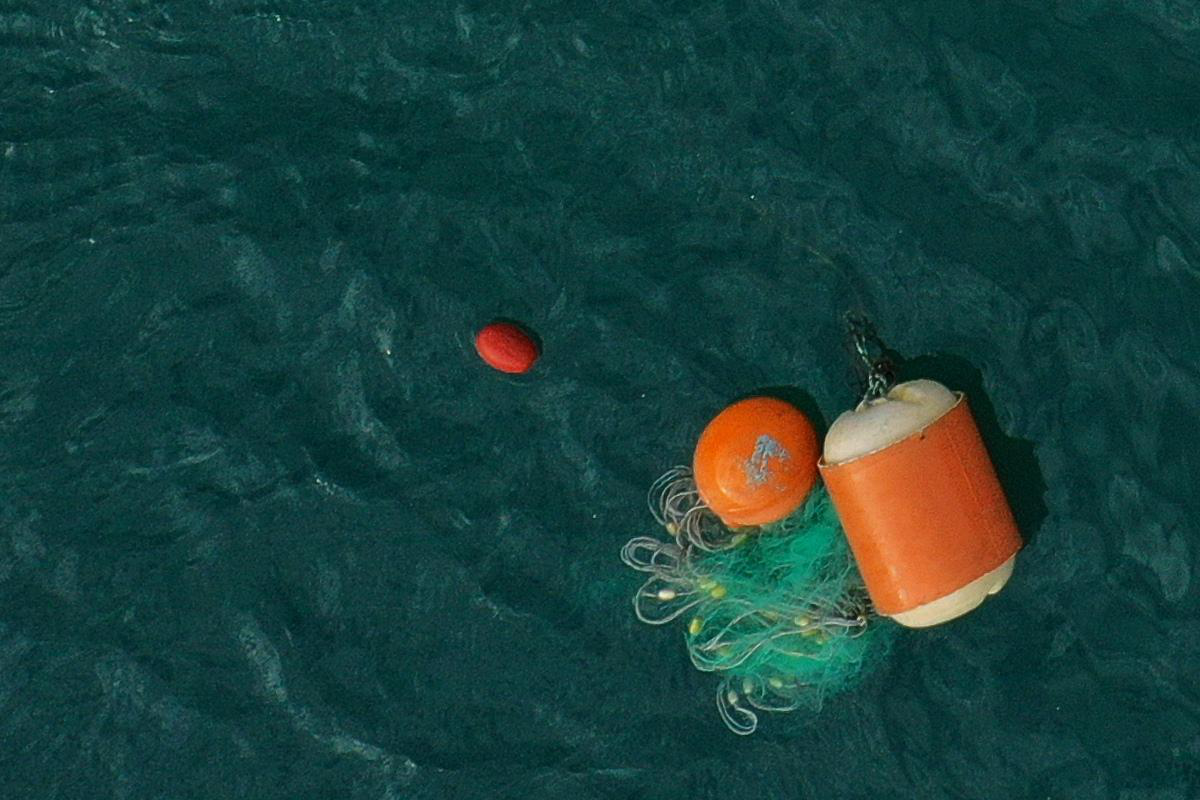

In [9]:
imgs[0][0]

In [10]:
imgs[0][1]

'FD_1023.jpg'

In [11]:
imgs[0][0].size

(1200, 800)

In [12]:
imgs[100][0].size

(3456, 3456)

TS1에는 700장의 이미지가 있고, 이미지 사이즈는 모두 다릅니다. 
샘플데이터에는 BoundingBox만 있고, Segmentation은 포함되어 있지 않습니다. 

In [13]:
# 폴더 경로 지정
path = '/content/drive/MyDrive/Teaching/DL 202301/해양쓰레기/원천데이터/TS_부유쓰레기(Bbox)/TS2'
files2 = os.listdir(path)

imgs2 = []

for file in files2:  # 파일명 순회
  file_path = os.path.join(path, file) # 경로 + 파일명
  img = Image.open(file_path) # 이미지 열기
  imgs2.append((img, file)) # 리스트에 추가

In [14]:
len(imgs2)

700

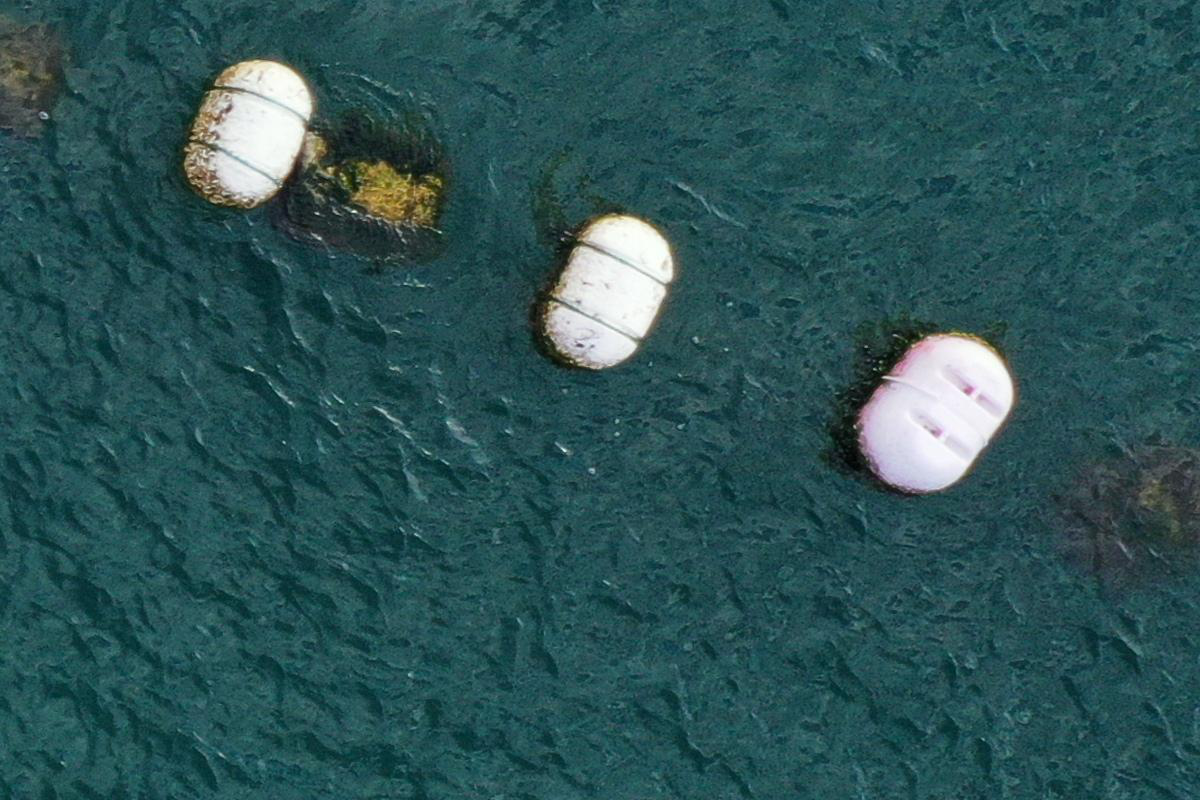

In [15]:
imgs2[0][0]

In [16]:
imgs2[0][1]

'FD_10065.jpg'

In [17]:
imgs2[0][0].size

(1200, 800)

첫번째 이미지의 해당 라벨링 데이터를 살펴봅시다

In [18]:
import json

file = '/content/drive/MyDrive/Teaching/DL 202301/해양쓰레기/라벨링데이터/TL_부유쓰레기(Bbox)/TL1/FD_1023.json'
with open(file, 'r') as f:  # r은 읽기 모드
  label = json.load(f)  #json 파일 읽기

json 파일은 딕셔너리와 리스트의 조합으로 변경됩니다. 

In [19]:
label

{'version': '4.5.9',
 'flags': {},
 'shapes': [{'label': 'Plastic_Buoy',
   'points': [[474, 322], [540, 375]],
   'origin': 'fishing',
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Plastic_Buoy',
   'points': [[692, 395], [821, 529]],
   'origin': 'fishing',
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Rope',
   'points': [[618, 464], [871, 734]],
   'origin': 'fishing',
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Net',
   'points': [[667, 476], [899, 710]],
   'origin': 'fishing',
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Plastic_Buoy',
   'points': [[816, 378], [1025, 629]],
   'origin': 'fishing',
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Rope',
   'points': [[842, 307], [896, 400]],
   'origin': 'fishing',
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': 'FD_1023.j

박스 정보와 라벨을 가져와서 그려봅시다

문서에 따르면 박스의 값은 아래와 같습니다

Bbox의 좌상단, 우하단 좌표


박스값은 shapes에 리스트로 들어가 있습니다. 

In [21]:
label['shapes']

[{'label': 'Plastic_Buoy',
  'points': [[474, 322], [540, 375]],
  'origin': 'fishing',
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'Plastic_Buoy',
  'points': [[692, 395], [821, 529]],
  'origin': 'fishing',
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'Rope',
  'points': [[618, 464], [871, 734]],
  'origin': 'fishing',
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'Net',
  'points': [[667, 476], [899, 710]],
  'origin': 'fishing',
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'Plastic_Buoy',
  'points': [[816, 378], [1025, 629]],
  'origin': 'fishing',
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'Rope',
  'points': [[842, 307], [896, 400]],
  'origin': 'fishing',
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

In [30]:
from PIL import ImageDraw

img_raw = imgs[0][0]
draw = ImageDraw.Draw(img_raw)  #PIL로 그릴수 있도록 합니다. 

for i in label['shapes']:
  y = i['label']
  bbox = i['points']
  print(bbox)
  point1 = tuple(bbox[0])  # PIL 위치는 리스트가 아닌 튜플로 입력해야 함
  point2 = tuple(bbox[1])
  draw.rectangle((point1, point2), outline = 'red', width = 2)
  draw.text((bbox[0][0]-10, bbox[0][1]), y)

[[474, 322], [540, 375]]
[[692, 395], [821, 529]]
[[618, 464], [871, 734]]
[[667, 476], [899, 710]]
[[816, 378], [1025, 629]]
[[842, 307], [896, 400]]


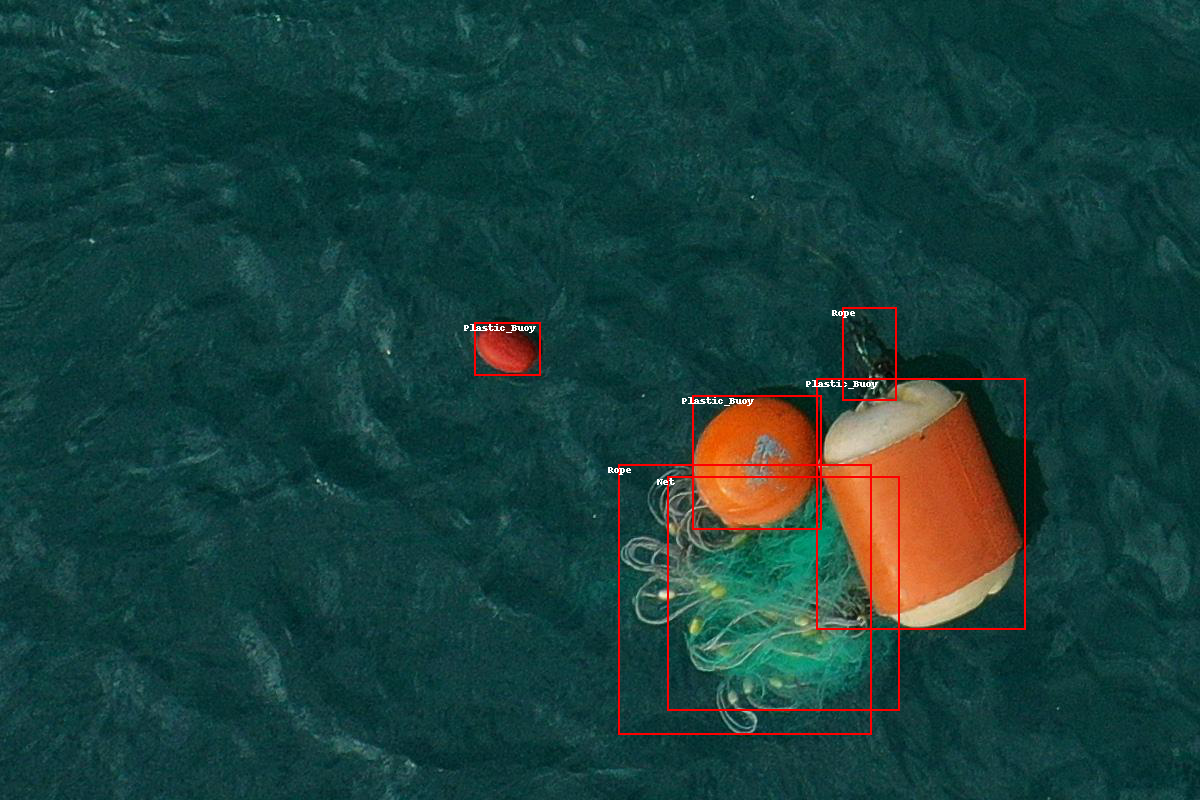

In [31]:
img_raw